# XGBoost 

XGBoost works with the concepts of boosting, where each model will build sequentially. Each model takes the previous model’s feedback and tries to have a laser view on the misclassification performed by the previous model. 

This feedback of building sequential models happens in parallel. Which helps in getting the XGBoost the fast it needs.


### A Loss Function To Be Optimized
- The selected loss function relies on the sort of problem which can be solved, and it must be differentiable. However, the numerous standard loss functions are supported, and you can set your preference. 

- For instance, classification problems might work with logarithmic loss, while regression problems may use a squared error. These differences are well explained in the article difference between R-Squared and Adjusted R-Squared.

- An advantage of the gradient boosting technique is that another boosting algorithm does not need to be determined for every loss function that might need to be utilized. 


### When To Use XGBoost
 - You have a large number of training samples. The definition of large in this criterion varies. Generally, a dataset greater than 1000 training samples and a few features, maybe 100, is considered fair. 

 - In practice, if the number of features in the training set is smaller than the number of training samples, XGBoost would work fine. 

 - XGBoost works when you have a mixture of categorical and numeric features - Or just numeric features in the dataset. ‘

### When To Not Use XGBoost
- The XGBoost algorithm would not perform well when the dataset's problem is not suited for its features. 
More precisely, XGBoost would not work with a dataset with issues such as Natural Language Processing (NLP), computer vision, image recognition, and understanding problems. 

- These datasets are best solved with deep learning techniques.
XGBoost should not be used when the size of the training dataset is small. If the training set is less than the number of features, XGBoost would not be efficient. 




## XGBoost Algorithm


### Step 1 -

- Consider the E.g. of Credit Card Dataset, We calculate the probability of Target(Using loss function optimization) and depending upon the probability the Target Residuals are found, here as it is binary classification problem probability is assumed to be 0.5.

- Probability is not the output of Base model, but the base model is constructed based on residuals for which we can calculate (probability or Average first).

### Step 2 - 

- Decision tree in XGBoost is only Binary tree irrespective of any number of classes present in categorical data.

- The feature that gives higher gain is selected first, If we have more than two categories and we know that we can just make binary tree then we try every combination of binary classification upon different classes of same feature and the one who gives best gain is selected.
for e.g. there are three categories in Credit score feature then we try binary classification as (GB,N)(GN,b) and which ever gives better gain is selected again similar process is carried out for different features and the feature which gives better Gain is selected at Root. 

- Let's consider Salary feature for which we classify data by two categories i.e. <50, >50. Here if we had more than two categories then we would have tried every combination of binary classification on that perticular feature and the one who gives higher similarity score is selected.

- Gain is calculated by Similarity weight and Similarity weight is calculated at every Node as follows

Similarity Weight $= \frac{\sum_{i}^{n} (Residual)^2}{\sum_{i}^{n} Probability(1-(Probability)+ \lambda)}$

        - Where,
         1. Residual are the Residuals that are in Perticular Node
         2. n is Number of Residual
         3. probability is .......

Similarity Weight for **Node1** that gives Salary <50

S.W = $\frac{[(-0.5)+0.5+0.5+(-0.5)]^2}{0.5(1-0.5)+0.5(1-0.5)+0.5(1-0.5)+0.5(1-0.5) + \lambda}$

S.W = 0

Similary for **Root Node** and **Node2** is calculated as 0.14, 0.33 respectively

Gain $= (\sum S.W. of Nodes)-(S.W. of Root Node)$

Gain for Salary feature with two categories >50 & <50 is..

Gain $= (0+0.33)-(0.14) $

Gain $= 0.21 $

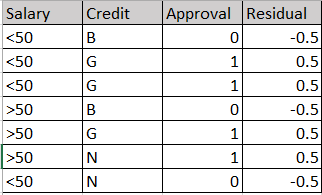

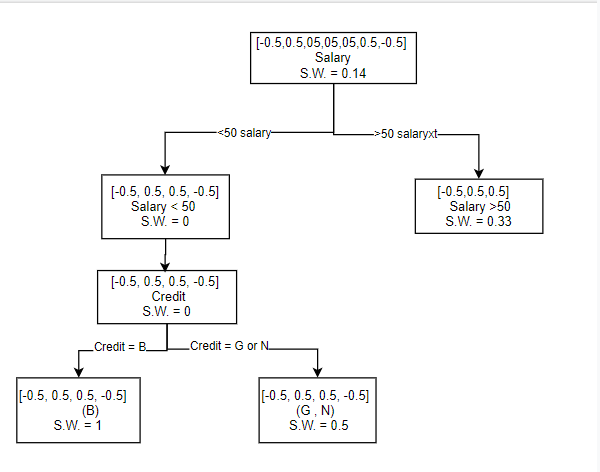



### Step 3 -

- Once we get first split now another Feature is selected with higher gain and various binary combinations are tried at each Leaf Node and one that gives Better Gain is selected.

- Here we select another feature **Credit** and we try every combination (GB, N)(GN,B) at every Leaf Node and one which gives higher gain is selected.

### Step 4 - 

- The process of Splitting and formimg new Branches is continued until the condition of cover value is reached i.e. When we find Gain of Any branch if the Gain is less than cover value then prunning is done which causes splitting to get terminated.

- Cover value is given by **Cover Value = Probability(1-(Probability)** if Gain is less than this then branching and splitting is stopped which is called as preprunning. 


### Step 5 -

- Once the Tree is completed it is called as Base Model and It is Used to get new Probability and based on that new Residuals for complete dataset

- Again the new Tree is Created in a similar way on New Probabilities and Residuals(unlike first probability new Probabilities may have different values for different records.)


for first data entry 
Salary is <50 and Credit is B then it is Classifed to LeafNode1 then Similarity Weight of LeafNode1 is taken into consideration, then Base model Output finded for the given data by following formula.



#### New Probability = $ \sigma (Base Model Output + Learning Rate * Similarity Weight)$
      
      - Base Model Output = $log\frac{Probability of data}{1 - Probability of data}
        which is 0 in this case. 
      
      - Learning Rate ($\alpha $) is specified initially Suppose say 0.1
      
      - Similarity weight is the S.W. of Leaf Node to which given data is classified suppose say first Leaf Node which have S.W. as 1
      
New Probability = $\sigma (0+(0.1* 1)$ = $\sigma (0.1)$ = $\frac {1}{1+e^-0.1}$
               
               = 0.6  this is the new Probability for first record


#### New residual  = Target Value - Probability 

              = 0 - 0.6 
              
              = 0.4 
              
Similary this is calculated for every record and new Probabilirties and Residuals updated and used to create new Tree.
      

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

## 2. Reading Data

In [2]:
data = pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/Skyserver.csv')
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


## 3. Preprocessing and Splitting 

In [3]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


### It is a Multiclas classification as their are Three classes

In [4]:
data["class"].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


#### Null value is not present

<AxesSubplot:>

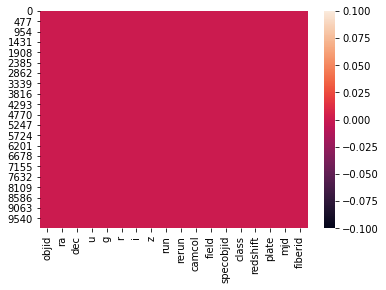

In [6]:
sns.heatmap(data.isnull())

### Dropping unnecessary features.

- **objid** and **specobjid** are just identifiers for accessing the rows back when they were stored in the original databank. Therefore we will not need them for classification as they are not related to the outcome.

- The features **run**, **rerun**, **camcol** and **field** are values which describe parts of the camera

In [7]:
data.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis=1, inplace=True)

#### Splitting into Features and Target

In [8]:
x = data.drop("class", axis=1)
y = data["class"]

print(x)
print(y)

              ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598370   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

      redshift  plate    mj

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 22)

# 4. XGBoost for classification

## XGBoost Parameters
The overall parameters have been divided into 3 categories by XGBoost authors:

### 1. General Parameters: Guide the overall functioning
Booster Parameters: Guide the individual booster (tree/regression) at each step
Learning Task Parameters: Guide the optimization performed

General Parameters
These define the overall functionality of XGBoost.

1. **booster** [default=gbtree]
     Select the type of model to run at each iteration. It has 2 options:
     - gbtree : tree-based models
     - gblinear: linear models

2. **silent** [default=0]:
    - Silent mode is activated is set to 1, i.e. no running messages will be printed. It’s generally good to keep it 0 as the messages might help in understanding the model.

3. **nthread** [default to maximum number of threads available if not set]
    - This is used for parallel processing and number of cores in the system should be entered
    - If you wish to run on all cores, value should not be entered and algorithm will detect automatically

There are 2 more parameters which are set automatically by XGBoost and you need not worry about them. Lets move on to Booster parameters.


### 2. Booster Parameters
Though there are 2 types of boosters, I’ll consider only tree booster here because it always outperforms the linear booster and thus the later is rarely used.

1. **eta** [default=0.3]
    - Analogous to learning rate in GBM
    - Makes the model more robust by shrinking the weights on each step Typical final values to be used: 0.01-0.2

2. **min_child_weight** [default=1]
     - Defines the minimum sum of weights of all observations required in a child.
     - This is similar to min_child_leaf in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”. Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
     - Too high values can lead to under-fitting hence, it should be tuned using CV.

3. **max_depth** [default=6]
     - The maximum depth of a tree, same as GBM.
     - Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
     - Should be tuned using CV.
     - Typical values: 3-10

4. **max_leaf_nodes**
     - The maximum number of terminal nodes or leaves in a tree.
     - Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
     - If this is defined, GBM will ignore max_depth.

5. **gamma** [default=0]
     - A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
     - Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.

6. **max_delta_step** [default=0]
     - In maximum delta step we allow each tree’s weight estimation to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative.
     - Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced.
This is generally not used but you can explore further if you wish.

7. **subsample** [default=1]
     - Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for each tree.
     - Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
     - Typical values: 0.5-1

8. **colsample_bytree** [default=1]
     - Similar to max_features in GBM. Denotes the fraction of columns to be randomly samples for each tree.
     - Typical values: 0.5-1

9. **colsample_bylevel** [default=1]
     - Denotes the subsample ratio of columns for each split, in each level.
     - I don’t use this often because subsample and colsample_bytree will do the job for you. but you can explore further if you feel so.

10. **lambda** [default=1]
     - L2 regularization term on weights (analogous to Ridge regression)
     - This used to handle the regularization part of XGBoost. Though many data scientists don’t use it often, it should be explored to reduce overfitting.

11. **alpha** [default=0]
    - L1 regularization term on weight (analogous to Lasso regression)
    - Can be used in case of very high dimensionality so that the algorithm runs faster when implemented

12. **scale_pos_weight** [default=1]
    - A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.
 

### Learning Task Parameters
These parameters are used to define the optimization objective the metric to be calculated at each step.

1. **objective** [default=reg:linear]
    - This defines the loss function to be minimized. Mostly used values are:
    1.  binary:logistic –logistic regression for binary classification, returns predicted probability (not class)
    2. multi:softmax –multiclass classification using the softmax objective, returns predicted class (not probabilities) you also need to set an additional num_class (number of classes) parameter defining the number of unique classes
    3. multi:softprob –same as softmax, but returns predicted probability of each data point belonging to each class.

2. **eval_metric** [ default according to objective ]
    - The metric to be used for validation data.
    - The default values are rmse for regression and error for classification.
    - Typical values are:
     1. rmse – root mean square error
     2. mae – mean absolute error
     3. logloss – negative log-likelihood
     4. error – Binary classification error rate (0.5 threshold)
     5. merror – Multiclass classification error rate
     6. mlogloss – Multiclass logloss
     7. auc: Area under the curve

3. **seed** [default=0]
   - The random number seed.
   - Can be used for generating reproducible results and also for parameter tuning.
   
   
If you’ve been using Scikit-Learn till now, these parameter names might not look familiar. A good news is that xgboost module in python has an sklearn wrapper called XGBClassifier. It uses sklearn style naming convention. The parameters names which will change are:

1. **eta –> learning_rate**
2. **lambda –> reg_lambda**
3. **alpha –> reg_alpha**

You must be wondering that we have defined everything except something similar to the “n_estimators” parameter in GBM. Well this exists as a parameter in XGBClassifier. However, it has to be passed as “num_boosting_rounds” while calling the fit function in the standard xgboost implementation


## General Approach for Parameter Tuning
We will use an approach similar to that of GBM here. The various steps to be performed are:

1. Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.

2. Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.

3. Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.

4. Lower the learning rate and decide the optimal parameters .

### Tuning
- learning_rate: 0.01
- n_estimators: 100 if the size of your data is high, 1000 is if it is medium-low
- max_depth: 3
- subsample: 0.8
- colsample_bytree: 1
- gamma: 1

2. Run model.fit(eval_set, eval_metric) and diagnose your first run, specifically the n_estimators parameter

3. Optimize `max_depth` parameter. It represents the depth of each tree, which is the maximum number of different features used in each tree. I recommend going from a low max_depth (3 for instance) and then increasing it incrementally by 1, and stopping when there’s no performance gain of increasing it. This will help simplify your model and avoid overfitting

4. Now play around with the learning rate and the features that avoids overfitting:

- `learning_rate`: usually between 0.1 and 0.01. If you’re focused on performance and have time in front of you, decrease incrementally the learning rate while increasing the number of trees.

- `subsample`, which is for each tree the % of rows taken to build the tree. I recommend not taking out too many rows, as performance will drop a lot. Take values from 0.8 to 1.

- `colsample_bytree`: number of columns used by each tree. In order to avoid some columns to take too much credit for the prediction (think of it like in recommender systems when you recommend the most purchased products and forget about the long tail), take out a good proportion of columns. Values from 0.3 to 0.8 if you have many columns (especially if you did one-hot encoding), or 0.8 to 1 if you only have a few columns.

- `gamma`: usually misunderstood parameter, it acts as a regularization parameter. Either 0, 1 or 5.
And you’re good to go!

The parameter base_score didn’t give me anything. Either it’s not relevant for convergence, or I don’t know how to use it.

In [11]:
xgb = XGBClassifier()